In [1]:
# code of sympy1.py without print-statements
import sympy as sp
x = sp.Symbol("x")
a, b, c, z = sp.symbols("a b c z") # create several symbols at once

some_formula = a*b*x*b + b**2*a*x - c*b*(2*a/c*x*b-1/(b*2))

# some calculus
y = sp.sin(x)*sp.exp(3*x)*sp.sqrt(a)

# derive
yd = y.diff(x) 

# substitution
y3 = y.subs([(x, z-1), (a, 25)])

→ no output is generated

In [2]:
# normaly this line would be in one of the first cells
# located here for didactical reasons

%load_ext ipydex.displaytools

This extension introduces the special comment `##:`.

It serves to display the results of assignments, thereby increasing the comprehensibility of the notebook.

Note the difference:

In [3]:
# same code with special-comments (`##:`)

x = sp.Symbol("x")
a, b, c, z = sp.symbols("a b c z") # create several symbols at once

some_formula = a*b*x*b + b**2*a*x - c*b*(2*a/c*x*b-1/(b*2)) ##:

# some calculus
y = sp.sin(x)*sp.exp(3*x)*sp.sqrt(a) ##:

# derive
yd = y.diff(x) ##:

# substitution
y3 = y.subs([(x, z-1), (a, 25)]) ##:

some_formula := 2*a*b**2*x - b*c*(2*a*b*x/c - 1/(2*b))

---


y := sqrt(a)*exp(3*x)*sin(x)

---


yd := 3*sqrt(a)*exp(3*x)*sin(x) + sqrt(a)*exp(3*x)*cos(x)

---


y3 := 5*exp(3*z - 3)*sin(z - 1)

---


---
Another trick: let sympy expressions be nicely rendered by $\LaTeX$ ⇒ readability ↑.

In [4]:
from sympy.interactive import printing
printing.init_printing()

%load_ext ipydex.displaytools

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


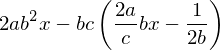

---


---


---


In [5]:
# same code with special-comments (`##:`)

x = sp.Symbol("x")
a, b, c, z = sp.symbols("a b c z") # create several symbols at once

some_formula = a*b*x*b + b**2*a*x - c*b*(2*a/c*x*b-1/(b*2)) ##:

# some calculus
y = sp.sin(x)*sp.exp(3*x)*sp.sqrt(a) ##:

# derive
yd = y.diff(x) ##:


### Common pitfall when substituting derivatives of functions (e.g. in differential equations)

In [6]:
# turn off latex-printing, to see the raw str-representation of the involved objects
printing.init_printing(0)

# create a Function
fd0 = sp.Function("f")(x) ##:

# create a derivative object
fd1 = fd0.diff(x) ##:

print("type:", type(fd1))
print("args:", fd1.args)

fd0 := f(x)

---


fd1 := Derivative(f(x), x)

---
type: <class 'sympy.core.function.Derivative'>
args: (f(x), x)


In [7]:
# define some differential equation

my_ode = a*fd1 + b*fd0 ##:

# now we want to replace the functions and the derivatives with symbols

fd0s, fd1s = sp.symbols("fd0, fd1")

rplmts_wrong_order = [(fd0, fd0s), (fd1, fd1s)] ##:

# reverse the list (slicing (indexing) from beginning to end with stepsize -1)
rplmts_correct_order = rplmts_wrong_order[::-1] ##:


my_ode := a*Derivative(f(x), x) + b*f(x)

---


rplmts_wrong_order := [(f(x), fd0), (Derivative(f(x), x), fd1)]

---


rplmts_correct_order := [(Derivative(f(x), x), fd1), (f(x), fd0)]

---


In [8]:
# this is wrong because the symbol fd0 now is inside the Derivative object
wrong_result = my_ode.subs(rplmts_wrong_order) ##:


# the symbol fd0 does obviously not depend on x -> evaluation of the derivative (performed by .doit()) leads to zero
wrong_result.doit()

wrong_result := a*Derivative(fd0, x) + b*fd0

---


b*fd0

In [9]:
correct_result = my_ode.subs(rplmts_correct_order) ##:

correct_result := a*fd1 + b*fd0

---


In [12]:
import ipydex
ipydex.save_current_nb_as_html()